## Linear regression on the California House Value dataset

In this exercise, you will perform linear regression on the California House Prices dataset.

This dataset contains median house value for California districts. This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data. For each block group, we have some information about it, that we will use as our features. We want to train a linear regression model that predicts the value of a house given the input features.

We don't have direct access to the dataset from PyTorch, but the `scikit` library provides a version of it.

An important part of the exercise will be to get used to process input dataset and translate it into a suitable format for your analysis.

In [466]:
# Import dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [467]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [468]:
print(dataset['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [469]:
dataset['data']

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [470]:
import torch

X = torch.tensor(dataset["data"])
y = torch.tensor(dataset["target"])

In [471]:
# Create a vector of 1s with the same size as X
ones = torch.ones(X.size()[0], 1)

In [472]:
# Concatenate ones and X
X = torch.cat((ones, X), 1)

In [473]:
X

tensor([[   1.0000,    8.3252,   41.0000,  ...,    2.5556,   37.8800,
         -122.2300],
        [   1.0000,    8.3014,   21.0000,  ...,    2.1098,   37.8600,
         -122.2200],
        [   1.0000,    7.2574,   52.0000,  ...,    2.8023,   37.8500,
         -122.2400],
        ...,
        [   1.0000,    1.7000,   17.0000,  ...,    2.3256,   39.4300,
         -121.2200],
        [   1.0000,    1.8672,   18.0000,  ...,    2.1232,   39.4300,
         -121.3200],
        [   1.0000,    2.3886,   16.0000,  ...,    2.6170,   39.3700,
         -121.2400]], dtype=torch.float64)

Concatenate X and y and shuffling

In [474]:
data_target = torch.cat((X, y.unsqueeze(1)), 1)
data_target = data_target[torch.randperm(data_target.size()[0])]

Split again in X and y

In [475]:
X = data_target[:, 0:-1]
y = data_target[:, -1]

Split into train_set and test_set

In [476]:
import math
# Choose fraction of training samples
train_frac = 0.8
# Compute number of training samples
num_train = math.floor(X.size()[0]*train_frac) # math.floor() method rounds a number DOWN to the nearest integer, if necessary,
num_test = X.size()[0] - num_train
print(f"Num. training samples: {num_train}")
print(f"Num. test samples: {num_test}")

Num. training samples: 16512
Num. test samples: 4128


In [477]:
# Select training samples
# - rows from 0 to num_train-1
# - all columns
X_train = X[:num_train,:]
y_train = y[:num_train]
# Select test samples
# - rows from num_train to the end
# - all columns
X_test = X[num_train:,:]
y_test = y[num_train:]

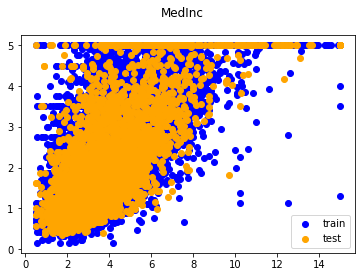

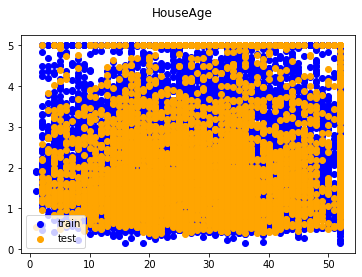

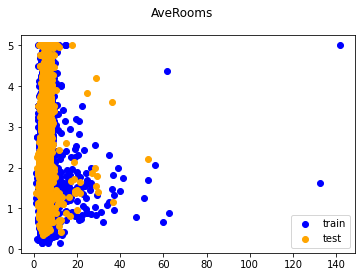

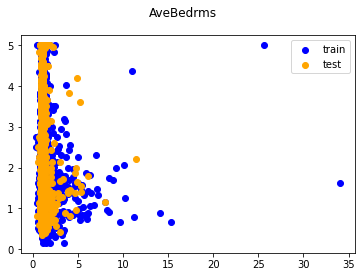

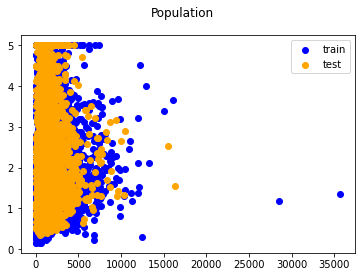

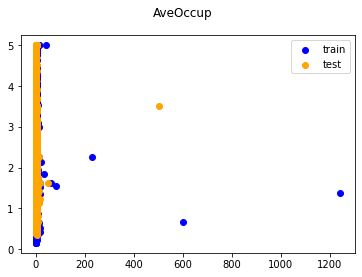

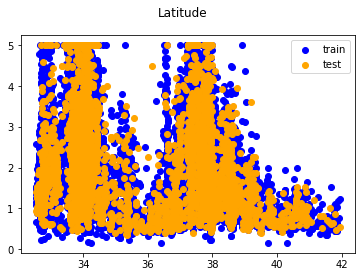

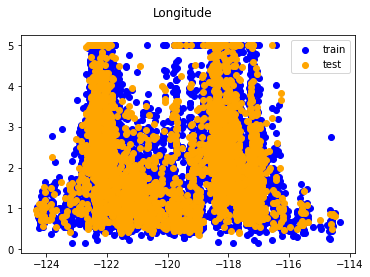

In [478]:
from matplotlib import pyplot as plt
# Plot data
for i in range(1,X.size()[1]):
  plt.scatter(X_train[:,i], y_train, label="train", color="blue")
  plt.scatter(X_test[:,i], y_test, label="test", color="orange")
  plt.suptitle(dataset['feature_names'][i-1])
  plt.legend()
  plt.show()

In [479]:
# Estimate theta
theta_est = (X_train.t() @ X_train).inverse() @ X_train.t() @ y_train
print("theta_est")
print(theta_est)

theta_est
tensor([-3.6790e+01,  4.3783e-01,  9.7387e-03, -1.0714e-01,  6.2663e-01,
        -1.8423e-06, -4.0947e-03, -4.1878e-01, -4.3255e-01],
       dtype=torch.float64)


MSE and MAE

In [480]:
# Compute MSE
train_mse = ((y_train - X_train @ theta_est)**2).sum()/num_train
test_mse = ((y_test - X_test @ theta_est)**2).sum()/num_test
print(f"Train MSE: {train_mse.item()}")
print(f"Test MSE:  {test_mse.item()}")

Train MSE: 0.5258088079094323
Test MSE:  0.5188957907370265


In [481]:
# Compute MAE
train_mae = (y_train - X_train @ theta_est).abs().sum()/num_train
test_mae = (y_test - X_test @ theta_est).abs().sum()/num_test
print(f"Train MAE: {train_mae.item()}")
print(f"Test MAE:  {test_mae.item()}")

Train MAE: 0.5319008969604825
Test MAE:  0.5317411081379986


Create correlation matrix

In [482]:
corr = []
for i in range(1, len(dataset['feature_names'])+1):
    for j in range(1, len(dataset['feature_names'])+1):
      mean1 = torch.mean(X[:, i])
      mean2 = torch.mean(X[:, j])
      x1_cent = X[:, i] - mean1
      x2_cent = X[:, j] - mean2
      covar12 = (x1_cent.t() @ x2_cent) / (X[:, i].size()[0] - 1)
      std1 = X[:, i].std()
      std2 = X[:, j].std()
      corr12 = covar12 / (std1 * std2)
      corr.append(corr12)

t_corr = torch.tensor(corr)
t_corr = t_corr.reshape(len(dataset['feature_names']), len(dataset['feature_names']))

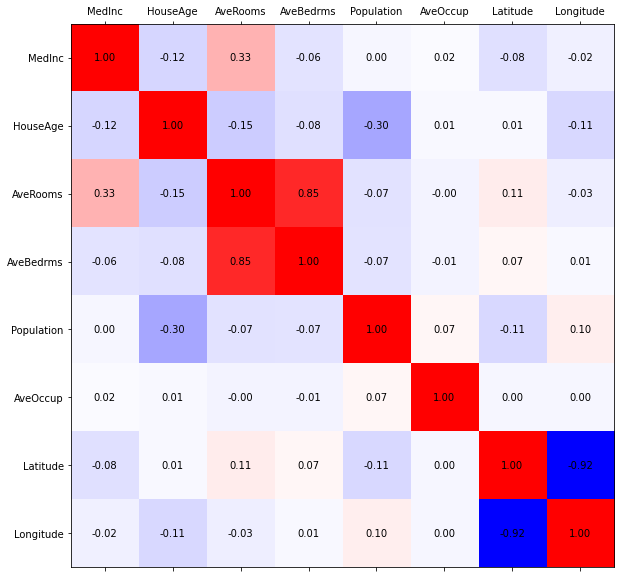

In [483]:
feature_names = dataset["feature_names"]

# Plot matrix
plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.set_xticks(torch.arange(len(feature_names)))
ax.set_yticks(torch.arange(len(feature_names)))
ax.set_xticklabels(feature_names)
ax.set_yticklabels(feature_names)
ax.matshow(t_corr, cmap=plt.cm.bwr)
for i in range(t_corr.size(0)):
    for j in range(t_corr.size(1)):
        c = f"{t_corr[i,j].item():.2f}"
        ax.text(j, i, str(c), va='center', ha='center')

Select from the dataset the values correlated more than 80%

In [484]:
corr_columns = []
for i in range(len(dataset['feature_names'])):
  for j in range(len(dataset['feature_names'])):
    if i != j:
      if abs(t_corr[i, j]) >= 0.8:
        corr_columns.append((j,i))

In [485]:
corr_columns

[(3, 2), (2, 3), (7, 6), (6, 7)]

In [486]:
corr_columns_without_reciprocal = []

# Of the value pairs, I choose only one, removing the reciprocal
for c in corr_columns:
    if (c[1], c[0]) not in corr_columns_without_reciprocal:
        corr_columns_without_reciprocal.append(c)

print(corr_columns_without_reciprocal)

[(3, 2), (7, 6)]


In [487]:
X.size()

torch.Size([20640, 9])

In [488]:
new_data = []

# I remove from the dataset the values just found
for i in range(len(dataset['feature_names'])+1):
    if not any(i == t[1] for t in corr_columns_without_reciprocal):
        new_data.append(X[:, i].tolist())

X_new = torch.tensor(new_data, dtype=torch.double).t()

In [489]:
X_new

tensor([[ 1.0000e+00,  3.5208e+00,  5.0211e+00,  ...,  4.7600e+02,
          3.3920e+01, -1.1746e+02],
        [ 1.0000e+00,  6.4800e+00,  6.0451e+00,  ...,  8.5100e+02,
          3.4030e+01, -1.1850e+02],
        [ 1.0000e+00,  2.5333e+00,  3.7143e+00,  ...,  1.3200e+02,
          3.5230e+01, -1.1575e+02],
        ...,
        [ 1.0000e+00,  3.4028e+00,  3.9106e+00,  ...,  7.2400e+02,
          3.3930e+01, -1.1747e+02],
        [ 1.0000e+00,  4.9250e+00,  5.5000e+00,  ...,  1.0160e+03,
          3.4180e+01, -1.1865e+02],
        [ 1.0000e+00,  4.1632e+00,  6.0216e+00,  ...,  1.3160e+03,
          3.4130e+01, -1.1739e+02]], dtype=torch.float64)

In [490]:
X_new.size()

torch.Size([20640, 7])

In [491]:
# Select training samples
# - rows from 0 to num_train-1
# - all columns
X_train = X_new[:num_train,:]
y_train = y[:num_train]
# Select test samples
# - rows from num_train to the end
# - all columns
X_test = X_new[num_train:,:]
y_test = y[num_train:]

New MSE and MAE

In [493]:
# Compute MSE
train_mse = ((y_train - X_train @ theta_est)**2).sum()/num_train
test_mse = ((y_test - X_test @ theta_est)**2).sum()/num_test
print(f"Train MSE: {train_mse.item()}")
print(f"Test MSE:  {test_mse.item()}")

Train MSE: 0.5395590622631671
Test MSE:  0.5264767454832449


In [494]:
# Compute MAE
train_mae = (y_train - X_train @ theta_est).abs().sum()/num_train
test_mae = (y_test - X_test @ theta_est).abs().sum()/num_test
print(f"Train MAE: {train_mae.item()}")
print(f"Test MAE:  {test_mae.item()}")

Train MAE: 0.5365509001712296
Test MAE:  0.5344245795971299


New correlation matrix which now includes Y

In [495]:
corr = []
for i in range(1, data_target.size()[1]):
    for j in range(1, data_target.size()[1]):
      mean1 = torch.mean(data_target[:, i])
      mean2 = torch.mean(data_target[:, j])
      x1_cent = data_target[:, i] - mean1
      x2_cent = data_target[:, j] - mean2
      covar12 = (x1_cent.t() @ x2_cent) / (data_target[:, i].size()[0] - 1)
      std1 = data_target[:, i].std()
      std2 = data_target[:, j].std()
      corr12 = covar12 / (std1 * std2)
      corr.append(corr12)

t_corr = torch.tensor(corr)
t_corr = t_corr.reshape(data_target.size()[1] -1 , data_target.size()[1] -1)

In [496]:
t_corr.size()

torch.Size([9, 9])

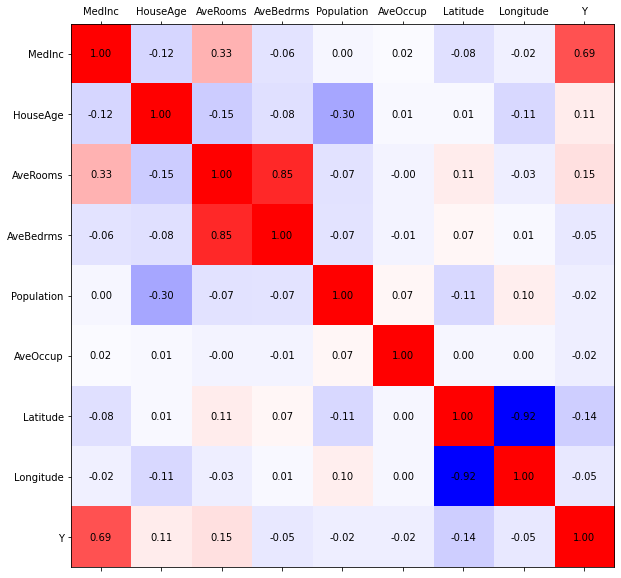

In [497]:
feature_names.append("Y")

# Plot matrix
plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.set_xticks(torch.arange(len(feature_names)))
ax.set_yticks(torch.arange(len(feature_names)))
ax.set_xticklabels(feature_names)
ax.set_yticklabels(feature_names)
ax.matshow(t_corr, cmap=plt.cm.bwr)
for i in range(t_corr.size(0)):
    for j in range(t_corr.size(1)):
        c = f"{t_corr[i,j].item():.2f}"
        ax.text(j, i, str(c), va='center', ha='center')

In [498]:
data_target.size()[1]

10

Remove the value least correlated with Y

In [499]:
less_corr_columns = []
min = 1.00
for i in range(data_target.size()[1]-1):
  if abs(t_corr[i, data_target.size()[1]-2]) < min:
    min = abs(t_corr[i, data_target.size()[1]-2])
    less_corr_columns = list([(i, data_target.size()[1]-2)])
  elif abs(t_corr[i, data_target.size()[1]-2]) == min:
    less_corr_columns.append((i, data_target.size()[1]-2))
print(min)

tensor(0.0237, dtype=torch.float64)


In [500]:
print(less_corr_columns)

[(5, 8)]


In [501]:
type(less_corr_columns)

list

In [502]:
less_corr_columns

[(5, 8)]

In [503]:
new_data = []

for i in range(data_target.size()[1]-1):
    if not any(c[0] == i for c in less_corr_columns):
        new_data.append(X[:, i].tolist())

data_target_new = torch.tensor(new_data, dtype=torch.double).t()

In [504]:
# Select training samples
# - rows from 0 to num_train-1
# - all columns
X_train = X[:num_train,:]
y_train = y[:num_train]
# Select test samples
# - rows from num_train to the end
# - all columns
X_test = X[num_train:,:]
y_test = y[num_train:]

In [505]:
# Estimate theta
theta_est = (X_train.t() @ X_train).inverse() @ X_train.t() @ y_train
print("theta_est")
print(theta_est)

theta_est
tensor([-3.6790e+01,  4.3783e-01,  9.7387e-03, -1.0714e-01,  6.2663e-01,
        -1.8423e-06, -4.0947e-03, -4.1878e-01, -4.3255e-01],
       dtype=torch.float64)


In [537]:
theta_est.shape

torch.Size([9])

New MSE and MAE

In [506]:
# Compute MSE
train_mse = ((y_train - X_train @ theta_est)**2).sum()/num_train
test_mse = ((y_test - X_test @ theta_est)**2).sum()/num_test
print(f"Train MSE: {train_mse.item()}")
print(f"Test MSE:  {test_mse.item()}")

Train MSE: 0.5258088079094323
Test MSE:  0.5188957907370265


In [507]:
# Compute MAE
train_mae = (y_train - X_train @ theta_est).abs().sum()/num_train
test_mae = (y_test - X_test @ theta_est).abs().sum()/num_test
print(f"Train MAE: {train_mae.item()}")
print(f"Test MAE:  {test_mae.item()}")

Train MAE: 0.5319008969604825
Test MAE:  0.5317411081379986


###PCA

In [508]:
# Import dataset
dataset = fetch_california_housing()
X = torch.tensor(dataset["data"])

In [509]:
# Compute mean and std over features (columns)
X_mean = X.mean(axis=0, keepdim=True)
print(X_mean.shape)
print(X_mean)
X_std = X.std(axis = 0, keepdim=True)
print(X_std.shape)
print(X_std)

torch.Size([1, 8])
tensor([[ 3.8707e+00,  2.8639e+01,  5.4290e+00,  1.0967e+00,  1.4255e+03,
          3.0707e+00,  3.5632e+01, -1.1957e+02]], dtype=torch.float64)
torch.Size([1, 8])
tensor([[1.8998e+00, 1.2586e+01, 2.4742e+00, 4.7391e-01, 1.1325e+03, 1.0386e+01,
         2.1360e+00, 2.0035e+00]], dtype=torch.float64)


In [510]:
# Standardize the data
X_cent = (X-X_mean)/X_std
print(X_cent.shape)
print('Mean:', X_cent.mean(0, keepdim = True))
print('Std:', X_cent.std(0, keepdim=True))

torch.Size([20640, 8])
Mean: tensor([[ 5.9900e-17,  2.6422e-17,  7.2810e-17, -1.0190e-16, -1.1705e-17,
          2.0655e-18, -1.0534e-15,  5.6384e-15]], dtype=torch.float64)
Std: tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]],
       dtype=torch.float64)


In [511]:
# Transpose data
X_cent = X_cent.t()
print(X_cent.size())

torch.Size([8, 20640])


##Computation of covariance matrix  Σ

In [512]:
# Compute (sample) covariance matrix
S = 1/(X_cent.size(1) - 1) * (X_cent @ X_cent.t())
print(S)

tensor([[ 1.0000, -0.1190,  0.3269, -0.0620,  0.0048,  0.0188, -0.0798, -0.0152],
        [-0.1190,  1.0000, -0.1533, -0.0777, -0.2962,  0.0132,  0.0112, -0.1082],
        [ 0.3269, -0.1533,  1.0000,  0.8476, -0.0722, -0.0049,  0.1064, -0.0275],
        [-0.0620, -0.0777,  0.8476,  1.0000, -0.0662, -0.0062,  0.0697,  0.0133],
        [ 0.0048, -0.2962, -0.0722, -0.0662,  1.0000,  0.0699, -0.1088,  0.0998],
        [ 0.0188,  0.0132, -0.0049, -0.0062,  0.0699,  1.0000,  0.0024,  0.0025],
        [-0.0798,  0.0112,  0.1064,  0.0697, -0.1088,  0.0024,  1.0000, -0.9247],
        [-0.0152, -0.1082, -0.0275,  0.0133,  0.0998,  0.0025, -0.9247,  1.0000]],
       dtype=torch.float64)


In [513]:
S.shape

torch.Size([8, 8])

In [514]:
X.shape

torch.Size([20640, 8])

## Eigenvectors and Eigenvalues

In [515]:
# Compute eigenvectors
e, V = torch.linalg.eig(S)
print(e)
print(V)
e, V = e.real, V.real
print(e)
print(V)

tensor([2.0269+0.j, 1.8813+0.j, 0.0456+0.j, 0.0816+0.j, 0.6594+0.j, 1.2711+0.j, 1.0310+0.j,
        1.0031+0.j], dtype=torch.complex128)
tensor([[ 0.0775+0.j, -0.2299+0.j, -0.2423+0.j,  0.1692+0.j, -0.1498+0.j,  0.2182+0.j,
          0.8853+0.j, -0.0026+0.j],
        [ 0.0073+0.j,  0.2608+0.j, -0.0448+0.j, -0.0810+0.j, -0.6839+0.j, -0.6276+0.j,
          0.1099+0.j,  0.2229+0.j],
        [ 0.4391+0.j, -0.5467+0.j,  0.4588+0.j, -0.5307+0.j, -0.0951+0.j, -0.0640+0.j,
          0.0464+0.j,  0.0299+0.j],
        [ 0.4000+0.j, -0.5018+0.j, -0.3799+0.j,  0.5316+0.j, -0.0869+0.j, -0.1918+0.j,
         -0.3381+0.j,  0.0509+0.j],
        [-0.1718+0.j, -0.1006+0.j, -0.0132+0.j, -0.0317+0.j, -0.6752+0.j,  0.6504+0.j,
         -0.2832+0.j,  0.0081+0.j],
        [-0.0146+0.j, -0.0026+0.j,  0.0090+0.j,  0.0032+0.j,  0.1694+0.j,  0.1577+0.j,
         -0.0049+0.j,  0.9727+0.j],
        [ 0.5684+0.j,  0.3740+0.j, -0.5544+0.j, -0.4318+0.j,  0.0421+0.j,  0.1926+0.j,
         -0.0622+0.j, -0.0228+0.j],
  

##Selecting Principal Components

In [516]:
#Sort Eigenvalues and the corresponding eigenvectors in descending order
e_sorted, indices = torch.sort(e, descending=True)
print(e_sorted)
print(indices)
V_sorted = V[:, indices]
print(V_sorted)

tensor([2.0269, 1.8813, 1.2711, 1.0310, 1.0031, 0.6594, 0.0816, 0.0456],
       dtype=torch.float64)
tensor([0, 1, 5, 6, 7, 4, 3, 2])
tensor([[ 0.0775, -0.2299,  0.2182,  0.8853, -0.0026, -0.1498,  0.1692, -0.2423],
        [ 0.0073,  0.2608, -0.6276,  0.1099,  0.2229, -0.6839, -0.0810, -0.0448],
        [ 0.4391, -0.5467, -0.0640,  0.0464,  0.0299, -0.0951, -0.5307,  0.4588],
        [ 0.4000, -0.5018, -0.1918, -0.3381,  0.0509, -0.0869,  0.5316, -0.3799],
        [-0.1718, -0.1006,  0.6504, -0.2832,  0.0081, -0.6752, -0.0317, -0.0132],
        [-0.0146, -0.0026,  0.1577, -0.0049,  0.9727,  0.1694,  0.0032,  0.0090],
        [ 0.5684,  0.3740,  0.1926, -0.0622, -0.0228,  0.0421, -0.4318, -0.5544],
        [-0.5370, -0.4224, -0.1808, -0.0598,  0.0118,  0.0826, -0.4617, -0.5262]],
       dtype=torch.float64)


##Explained Variance

In [517]:
tot = sum(e_sorted)
var_exp = torch.tensor([(i / tot)*100 for i in e_sorted])
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_var_exp = torch.cumsum(var_exp, -1)

In [518]:
var_exp

tensor([25.3369, 23.5162, 15.8886, 12.8880, 12.5382,  8.2423,  1.0200,  0.5698],
       dtype=torch.float64)

In [519]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [520]:
len(dataset['feature_names'])

8

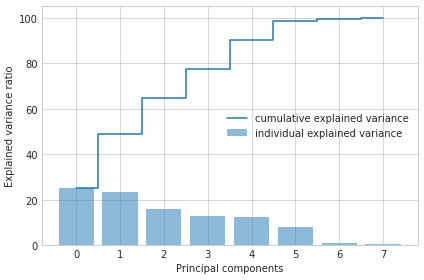

In [521]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(dataset['feature_names'])), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(dataset['feature_names'])), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

##Projection Onto the New Feature Space

In [522]:
# Eigenvectors as column, but projection matrix needs them as rows
proj_mat = V_sorted[:, :2].t()
print(proj_mat)
print(proj_mat.shape)

tensor([[ 0.0775,  0.0073,  0.4391,  0.4000, -0.1718, -0.0146,  0.5684, -0.5370],
        [-0.2299,  0.2608, -0.5467, -0.5018, -0.1006, -0.0026,  0.3740, -0.4224]],
       dtype=torch.float64)
torch.Size([2, 8])


In [523]:
X_cent.shape

torch.Size([8, 20640])

In [524]:
# Project data
proj_data = proj_mat @ X_cent

In [525]:
dataset['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [526]:
type(dataset['feature_names'])

list

In [527]:
Y = proj_data.t()
print(Y)

tensor([[1.8827, 0.5033],
        [1.3711, 0.1214],
        [2.0868, 0.5011],
        ...,
        [1.4023, 1.0964],
        [1.5429, 1.0594],
        [1.4055, 0.8967]], dtype=torch.float64)


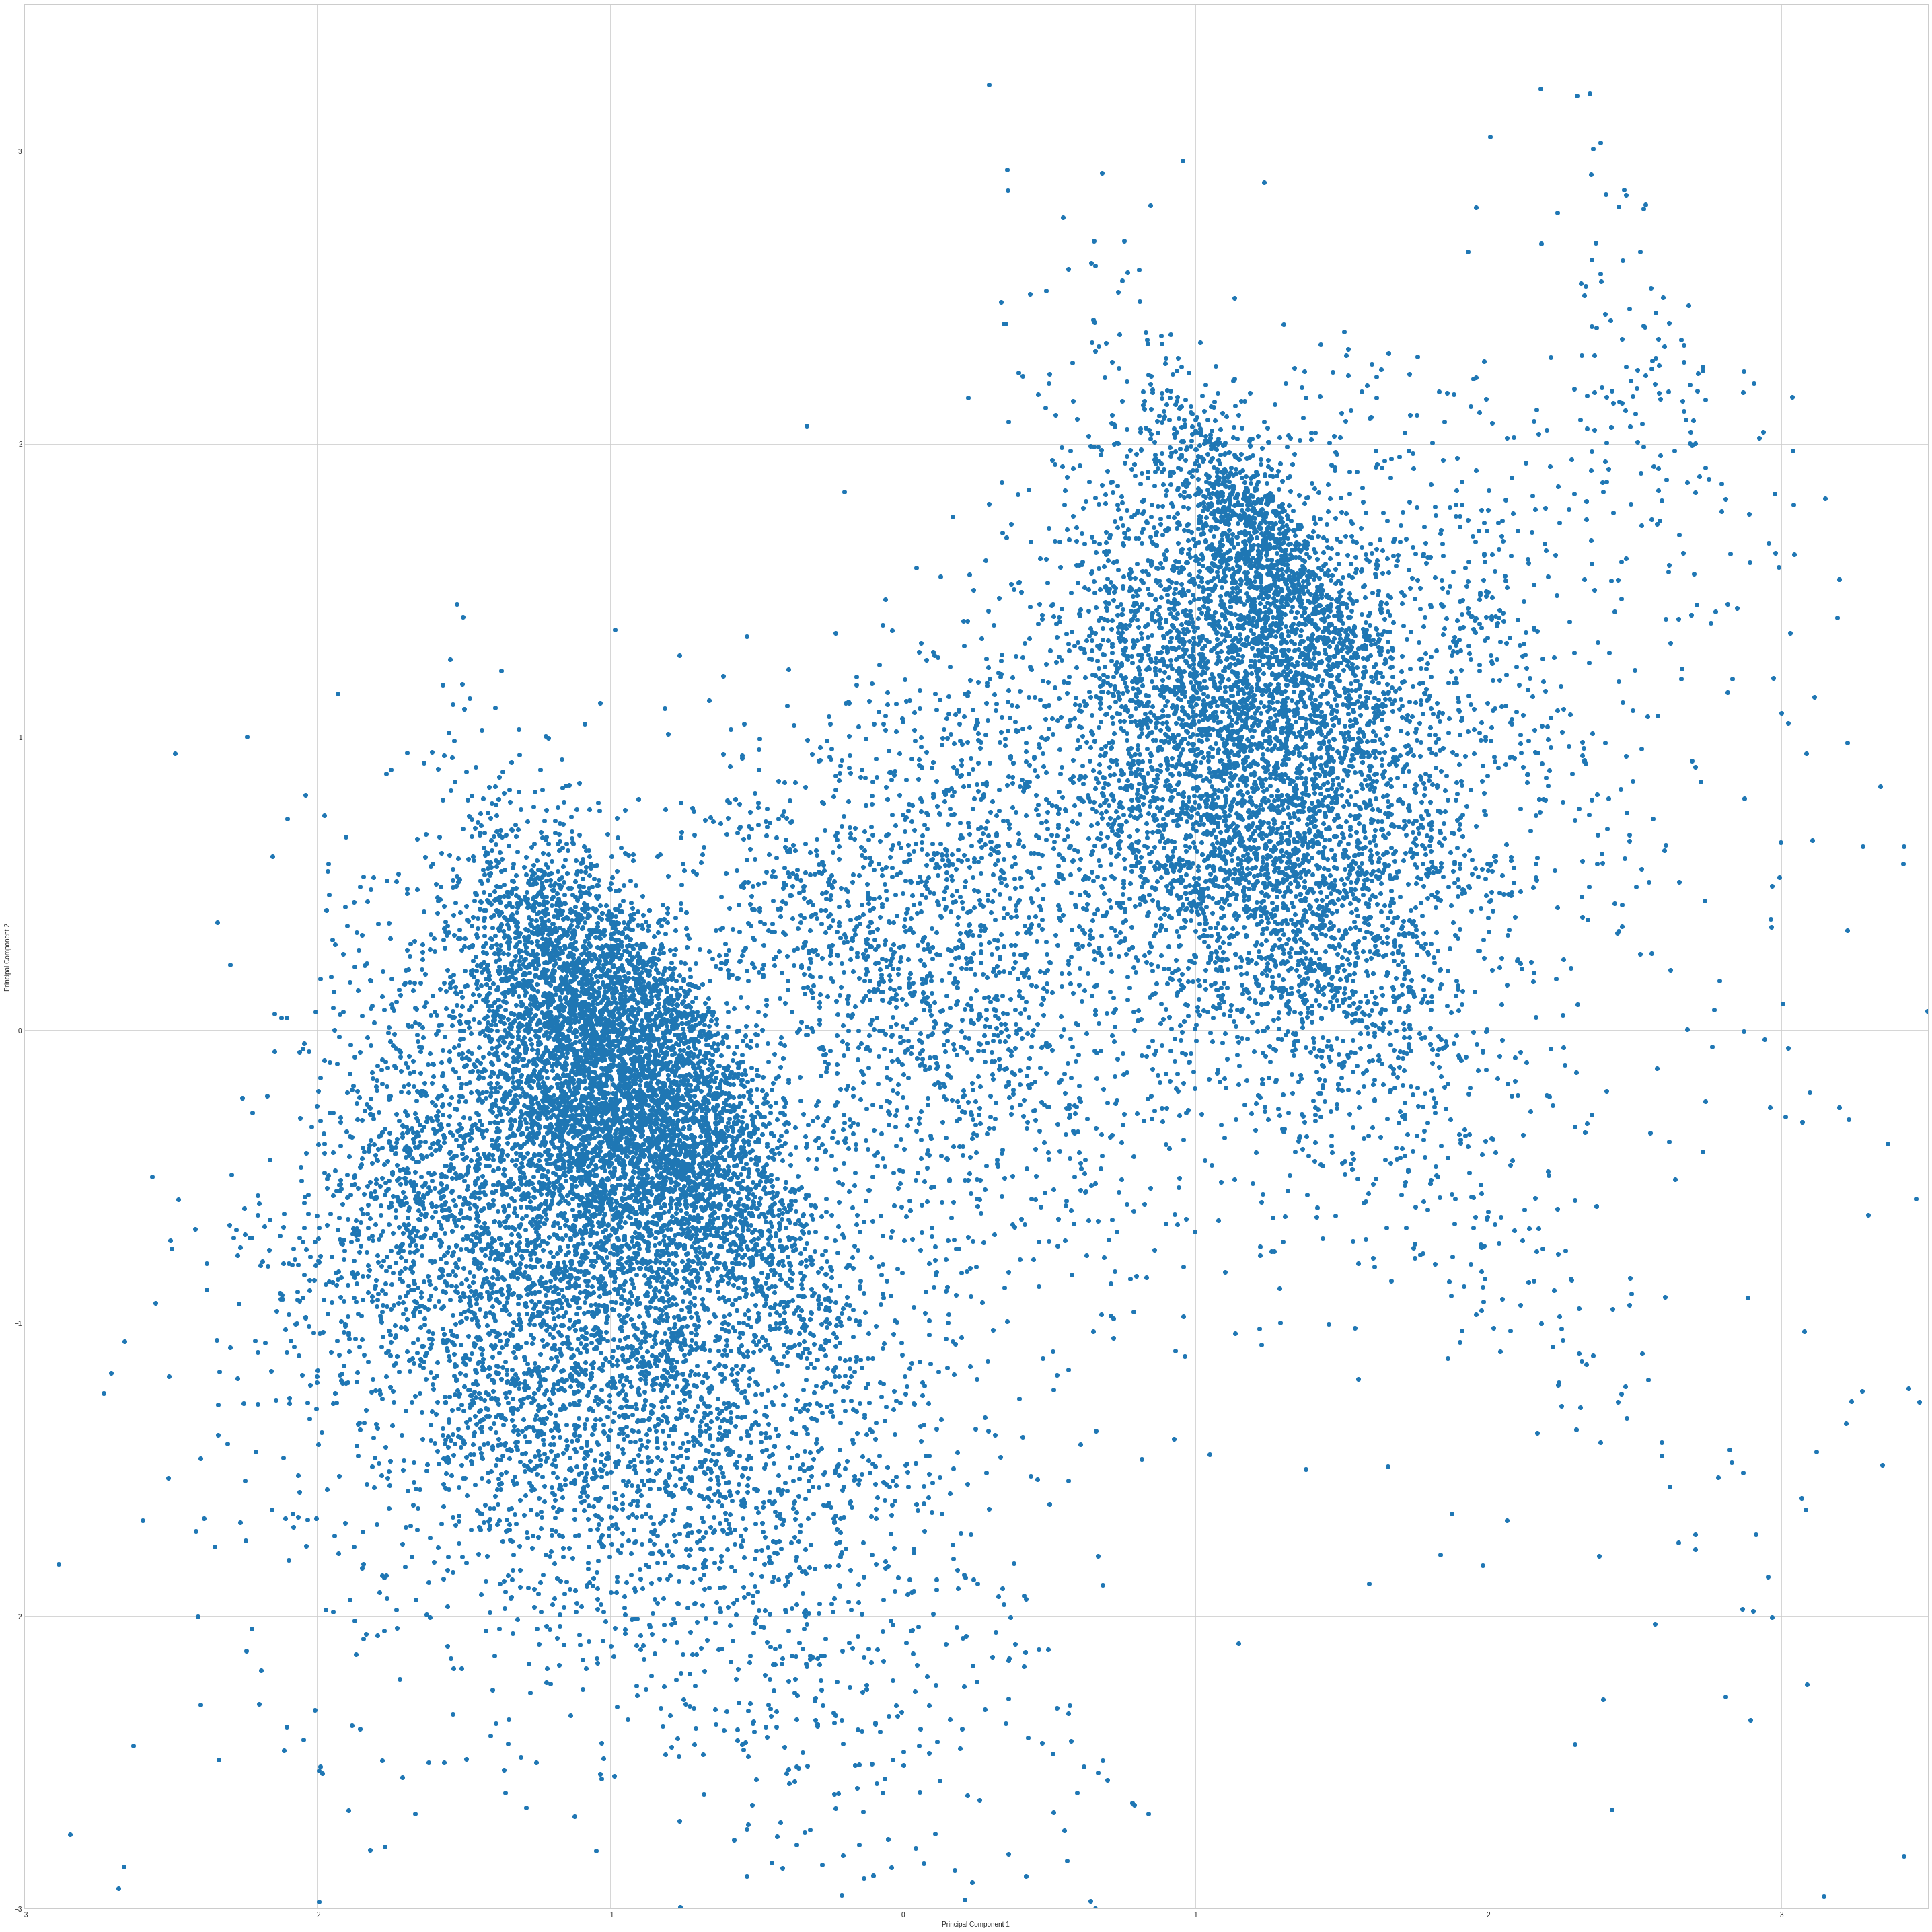

In [531]:
# Visualize data
Y = proj_data.t()

Y = proj_data.t()

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(40, 40))
    plt.scatter(Y[:, 0], Y[:, 1])
    plt.xlim(-3,3.5)
    plt.ylim(-3,3.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()
    plt.show()

In [534]:
X.shape

torch.Size([20640, 8])

In [539]:
RS = 0
from sklearn.manifold import TSNE
import time
time_start = time.time()

iris_tsne = TSNE(random_state=RS, n_components=3).fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 815.2560586929321 seconds


/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


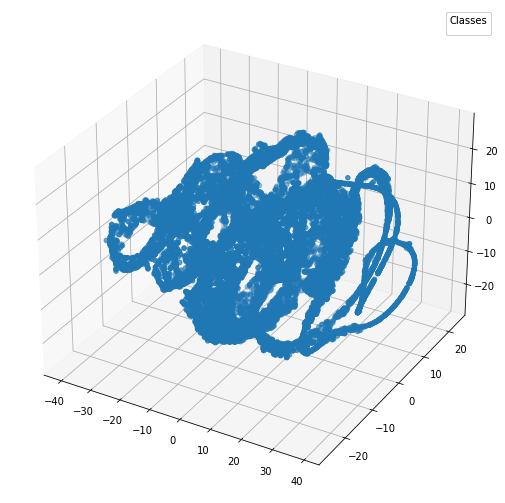

In [540]:
fig3 = plt.figure(figsize=(14,9))
ax3 = fig3.add_subplot(111, 
                     projection='3d')
scatter = ax3.scatter(iris_tsne[:,0], iris_tsne[:,1], iris_tsne[:,2])
legend_graphs, legend_labels = scatter.legend_elements()
legend = ax3.legend(legend_graphs, legend_labels, title="Classes")
ax3.add_artist(legend)
plt.show()